In [1]:
import numpy as np
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#config notebook
%config InlineBackend.figure_format ='retina'
pd.set_option("display.max_rows", None, "display.max_columns", None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
def load_data_csv(path):
  dataframe = pd.read_csv(path)
  return dataframe
df  = load_data_csv('https://raw.githubusercontent.com/anuwatavis/dataset/master/BIG%20MART%20SALES%20PREDICTION/Train.csv')

In [3]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['Low Fat', 'low fat', 'Regular', 'reg'], ['LF', 'LF', 'REG', 'REG'])

In [4]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('category')

In [5]:
avg =df['Item_Weight'].mean()
df['Item_Weight'].fillna(value=avg, inplace=True)

In [6]:
df['Outlet_Size'].fillna(value = 'Medium', inplace =True)

In [7]:
df =df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

In [8]:
df_real = pd.get_dummies(df, drop_first=True)

In [9]:
from sklearn.preprocessing  import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [10]:
X =df_real.drop(['Item_Outlet_Sales'], axis =1 )
y = np.array(df_real['Item_Outlet_Sales']).reshape(-1, 1)

In [11]:
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# 59.  สร้างโมเดลแบบ Random Forest Regression โดยใช้ทุก features


In [14]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [16]:
predicted =  sc_y.inverse_transform(rf_regressor.predict(X_test))
predicted

array([ 826.69057  ,  942.812748 ,  745.489602 , ...,  753.85205  ,
        563.5903788, 1575.422618 ])

# 60. ทดสอบโมเดลวัดค่า MAE, MSE, RMSE และ R2



In [17]:
from sklearn import metrics

In [18]:
y_real = sc_y.inverse_transform(y_test)

In [19]:
MAE = metrics.mean_absolute_error(y_real, predicted)
MSE = metrics.mean_squared_error(y_real, predicted)
RMSE = np.sqrt(metrics.mean_squared_error(y_real, predicted))
R2 = metrics.r2_score(y_real, predicted)
print('MAE', MAE)
print('MSE', MSE)
print('RMSE', RMSE)
print('R2', R2 )

MAE 763.1907675851738
MSE 1193924.5890570823
RMSE 1092.66856322358
R2 0.5607293090820323


# 61. สร้าง distribution plot ของผลต่างระหว่าง y_test กับ predicted results




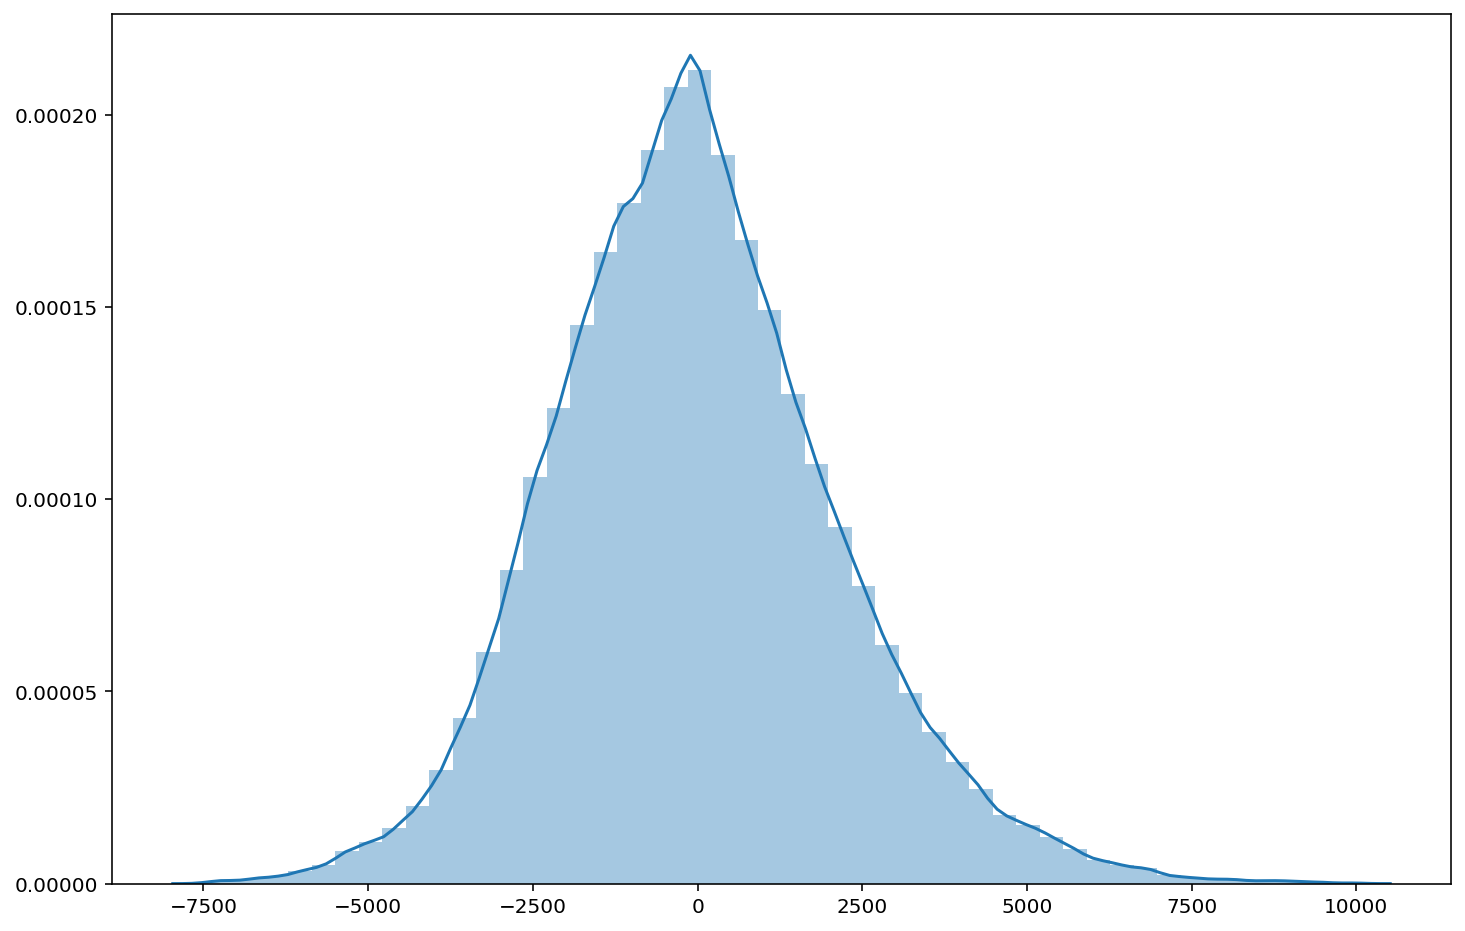

In [20]:
#normal distribution checking 
fig = plt.figure(figsize=(12,8))
sns.distplot(y_real-predicted, bins=50)

# 62. สร้าง dataframe เปรียบเทียบ ยอดขายจริงกับการทำนาย




In [21]:
dict_compare = {'Sales' : y_real.flatten(), 'Predicted' : predicted.flatten()}
df_predicted = pd.DataFrame(dict_compare)
df_predicted.head()

,Sales,Predicted
0,1743.0644,826.690570
1,356.8688,942.812748
2,377.5086,745.489602
3,5778.4782,4660.380286
4,2356.9320,2120.712818


# 63. หา Correlation จาก dataframe ข้อ 62



In [22]:
df_predicted.corr()

,Sales,Predicted
Sales,1.000000,0.754352
Predicted,0.754352,1.000000


### ข้อที่ 64-84 ได้ไปแล้วในการเปรียบเทียบก่อนหน้าสรุปได้ว่า
linear regression ไม่จำเป็นต้องทำ Standard Scaler
Support Vector Regression ควรทำ Standard Scaler
Decistion Tree ไม่จำเป็นต้องทำ Standard Scaler
Random Forest ไม่จำเป็นต้องทำ Standard Scaler


